In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import pandas as pd

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
case = pd.read_csv('1. EDA_컬럼분할, 제거.csv', header = 0, index_col = 0)

In [3]:
case['객체대분류'].unique()

array(['건설자재', '질병', '가시설', '건설공구', '시설물', '건설기계', '기타', '부재', '토사 및 암반',
       nan], dtype=object)

In [4]:
case['객체소분류'].unique()

array(['데크플레이트', '질병', '거푸집', '작업발판', '자재', '사다리', '건물', '굴착기',
       '고소작업차(고소작업대 등)', '기타', '덕트', '파형강판', '흙막이가시설', '비계', '콘크리트펌프',
       '전주, 전선', '기중기(이동식크레인 등)', '공구류', '벽이음', '배관', '타워크레인', '철골부재',
       '담장', '강관동바리', '철근', '가설계단', '볼트', '지게차', '콘크리트믹서트럭', '벽체',
       '시스템동바리', '슬래브', '개구부', '천공기', '기타 가시설', '파이프서포트', '핀', '절토사면',
       '버팀보', '건설폐기물', '낙하물방지망', '와이어로프', '안전시설물', '특수거푸집(갱폼 등)', '지하매설물',
       '지지대', '지반', '공기압축기', '항타 및 항발기', '작업대차', '석축', '경사면', '암사면',
       '잭서포트', '버팀대', '차량', '거더', 'PSC빔', '옹벽', '성토사면', '창호', '덤프트럭',
       '특수건설기계', '복공판', '띠장', '수평연결재', '콘크리트뱃칭플랜트', '엄지말뚝', '콘크리트피니셔',
       '선라이트', '어스오거', '부석', '굴착사면', '천정패널', '아스팔트살포기', '터널 갱구부', '교각 기초',
       nan, '지하벽체', '브라켓', '준설선', '전도방지재', '체인블럭', '로더', '지주가설재', 'RCS발판',
       '보강토 옹벽', '몰탈혼합기', '롤러', '비산물', '철망', '벽돌', '레일', '터널 막장면',
       '위험물저장탱크', '안전핀', '불도저', '가물막이', '트러스', '유증기', '돌담', '가설도로',
       '슬레이트', '방음벽', '기성말뚝', '모터그레이더', '교량 바닥판', '조적벽체', '터널 천단부',
       '콘크리트살포기', 

In [5]:
# '객체대분류' 기준으로 '객체소분류'의 갯수
object = case['객체소분류'].groupby(case['객체대분류'])
object.size()

객체대분류
가시설        3442
건설공구       1243
건설기계       1002
건설자재       2100
기타         1934
부재          554
시설물         523
질병          144
토사 및 암반     269
Name: 객체소분류, dtype: int64

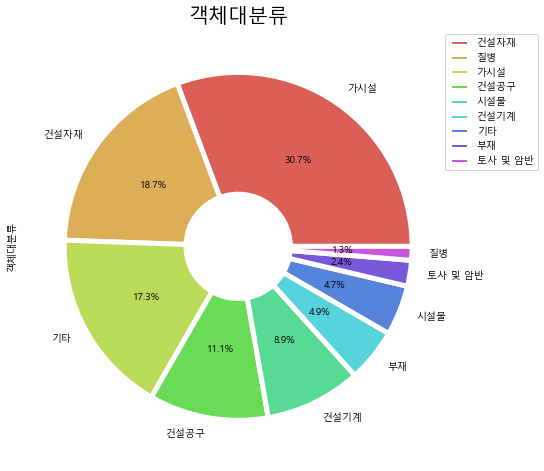

In [23]:
# '객체대분류' 비율
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')

ax = fig.add_subplot()
ax.set_ylabel('')

colors = sns.color_palette('hls', len(case['객체대분류'].unique()))
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

case['객체대분류'].value_counts().plot.pie(autopct = '%1.1f%%', colors = colors, wedgeprops=wedgeprops)


plt.title('객체대분류', fontsize = 20)
plt.legend(case['객체대분류'].unique(), loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

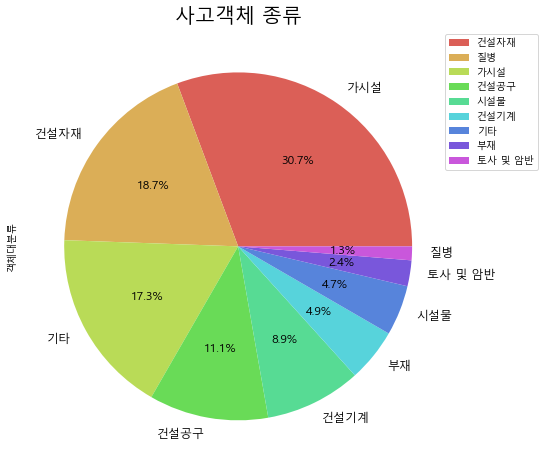

In [26]:
# '객체대분류' 비율
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')

ax = fig.add_subplot()
ax.set_ylabel('')

colors = sns.color_palette('hls', len(case['객체대분류'].unique()))
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

case['객체대분류'].value_counts().plot.pie(autopct = '%1.1f%%', colors = colors, textprops={'size': 12})


plt.title('사고객체 종류', fontsize = 20)
plt.legend(case['객체대분류'].unique(), loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

In [8]:
accd_object = object.unique().reset_index()
accd_object

,객체대분류,객체소분류
0,가시설,"[거푸집, 작업발판, 흙막이가시설, 비계, 벽이음, 강관동바리, 가설계단, 시스템동..."
1,건설공구,"[사다리, 공구류, 몰탈혼합기]"
2,건설기계,"[굴착기, 고소작업차(고소작업대 등), 콘크리트펌프, 기중기(이동식크레인 등), 타..."
3,건설자재,"[데크플레이트, 자재, 덕트, 파형강판, 철근, 볼트, 파이프서포트, 핀, 와이어로..."
4,기타,"[기타, 전주, 전선, 건설폐기물, 지하매설물, 작업대차, 차량, 비산물, 유증기]"
5,부재,"[배관, 철골부재, 벽체, 슬래브, 개구부, 거더, PSC빔, 교각 기초, 트러스,..."
6,시설물,"[건물, 담장, 석축, 옹벽, 터널 갱구부, 보강토 옹벽, 위험물저장탱크, 돌담, ..."
7,질병,[질병]
8,토사 및 암반,"[절토사면, 지반, 경사면, 암사면, 성토사면, 부석, 굴착사면, 벽돌, 터널 막장..."


In [9]:
# accd_object.to_csv('2_4. 사고객체 리스트.csv')